In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.duplicated().sum()

0

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Gender"]=le.fit_transform(data["Gender"])

In [7]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [8]:
from sklearn.cluster import KMeans

In [9]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,random_state=42,n_init=10)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

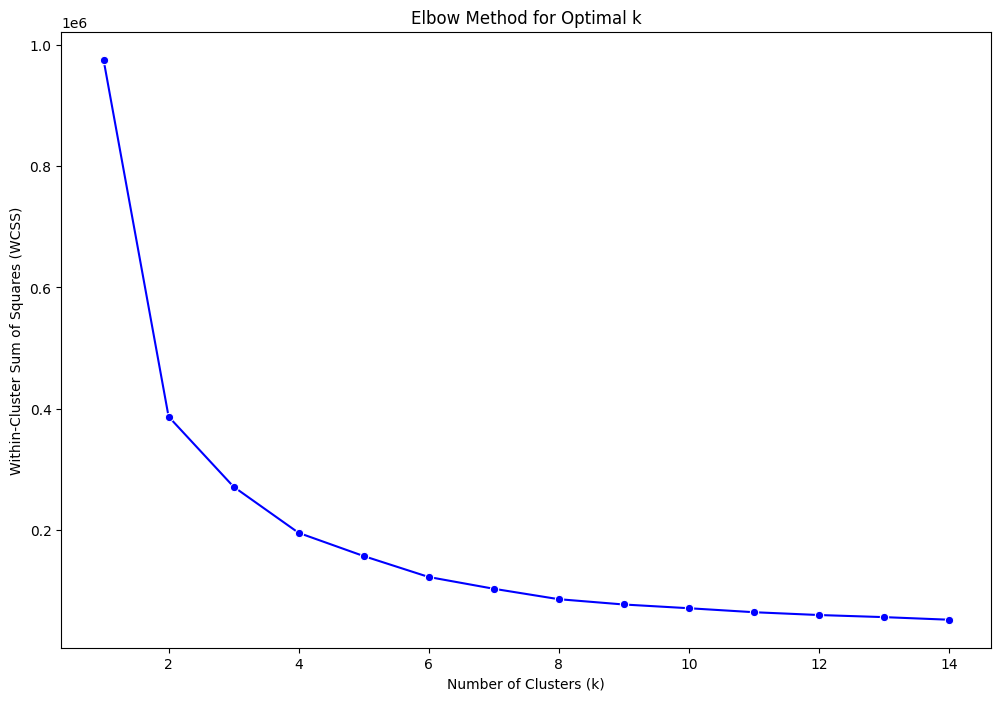

In [10]:
plt.figure(figsize=(12,8))
sns.lineplot(x=range(1,15),y=wcss,marker='o', color='blue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

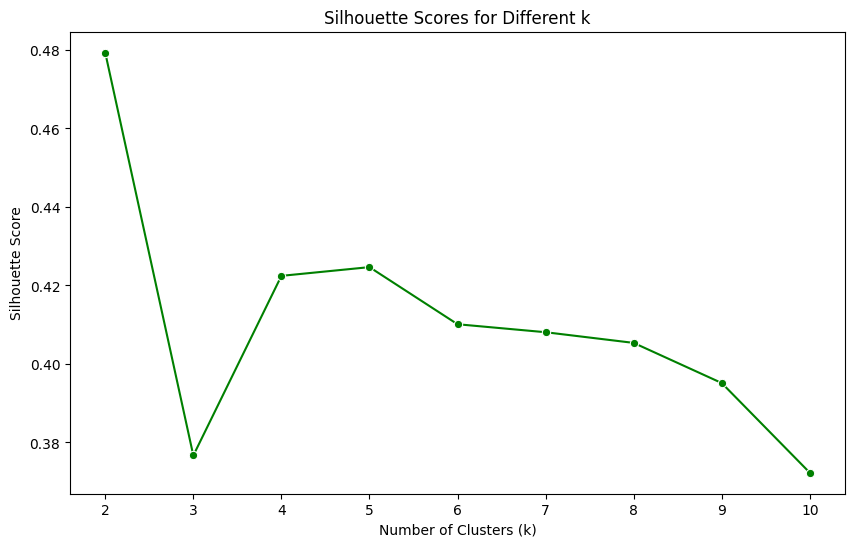

In [11]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different values of k
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_scores.append(silhouette_score(data, cluster_labels))

# Plot silhouette scores
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(2, 11), y=silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(data)

In [13]:
cluster_labels

array([1, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [14]:
data1=data

In [15]:
data1['cluster_label'] = kmeans.labels_

In [16]:
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_label
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,4
3,4,0,23,16,77,1
4,5,0,31,17,40,4


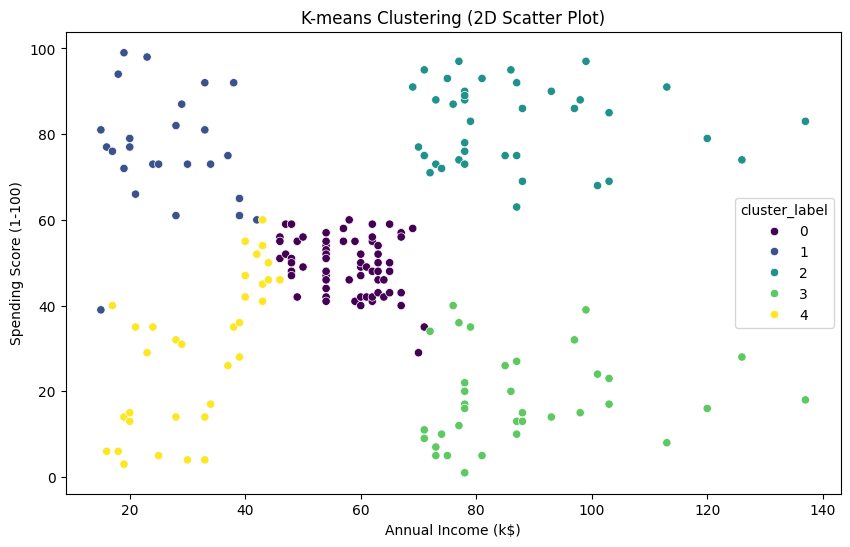

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster_label', data=data1, palette='viridis')
plt.title('K-means Clustering (2D Scatter Plot)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

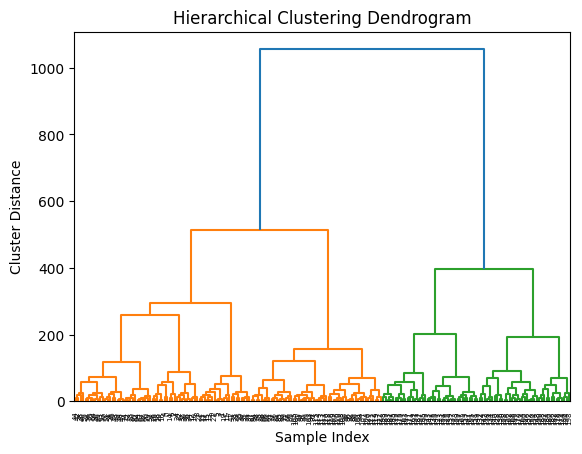

In [18]:
linked = linkage(data, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.show()

In [22]:
# Choose a suitable cut-off height to determine the number of clusters
cut_off_height = 800  # Adjust this value based on your analysis

# Assign cluster labels using fcluster
cluster_labels = fcluster(linked, t=cut_off_height, criterion='distance')

# Add the cluster labels to your original dataframe
data['Cluster'] = cluster_labels

In [23]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_label,Cluster
0,1,1,19,15,39,1,2
1,2,1,21,15,81,1,2
2,3,0,20,16,6,4,2
3,4,0,23,16,77,1,2
4,5,0,31,17,40,4,2
...,...,...,...,...,...,...,...
195,196,0,35,120,79,2,1
196,197,0,45,126,28,3,1
197,198,1,32,126,74,2,1
198,199,1,32,137,18,3,1
